In [56]:
import pandas as pd
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# 데이터셋 로드
boston = load_boston()

# boston 데이타셋 변환
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)

# boston data set의 target array는 주택 가격이다. 이를 price 형태로 dataframe에 추가
boston_df['PRICE'] = boston.target
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


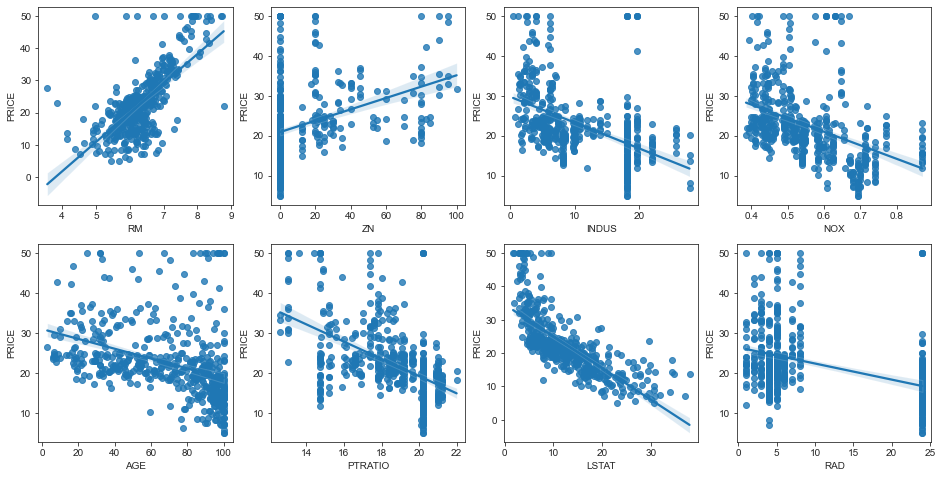

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
sns.set_style("ticks")
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE', data=boston_df,ax =axs[row][col])

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

boston_df.head()
y_target = boston_df["PRICE"]
x_data = boston_df.drop(["PRICE"],axis=1,inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=56)

lr = LinearRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
print("MSE : {:.3f} \nRMSE : {:.3f}".format(mse, rmse))
print("Valance Score : {:.3f}".format(r2_score(y_test,pred_lr)))

MSE : 25.847 
RMSE : 5.084
Valance Score : 0.700


In [63]:
# 회귀계수
coeff = pd.Series(data = np.round(lr.coef_,4),index= x_data.columns)
print(coeff.sort_values(ascending=False))

RM          4.4909
CHAS        2.4902
RAD         0.2567
INDUS       0.0482
ZN          0.0286
B           0.0101
AGE         0.0028
TAX        -0.0113
CRIM       -0.0545
LSTAT      -0.5020
PTRATIO    -1.0019
DIS        -1.2239
NOX       -17.4104
dtype: float64


In [64]:
from sklearn.model_selection import cross_val_score

y_target = boston_df["PRICE"]
x_data = boston_df.drop(["PRICE"],axis=1,inplace=False)
lr = LinearRegression()

neg_mse_score = cross_val_score(lr,x_data,y_target,scoring = 'neg_mean_squared_error',cv=5)
rmes_scores = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmes_scores)

print("Negative MSE Scores : ",np.round(neg_mse_score,2))
print("RMSE Score : ",np.round(rmes_scores,2))
print("Average RMSE Score : {:.3f}".format(avg_rmse))

Negative MSE Scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
RMSE Score :  [3.53 5.1  5.75 8.99 5.77]
Average RMSE Score : 5.829


In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_score = cross_val_score(ridge,x_data,y_target,scoring="neg_mean_squared_error",cv =5)
rmes_scores = np.sqrt(-1*neg_mse_score)
avg_rmse = np.mean(rmes_scores)

print("Negative MSE Scores : ",np.round(neg_mse_score,2))
print("RMSE Score : ",np.round(rmes_scores,2))
print("Average RMSE Score : {:.3f}".format(avg_rmse))


Negative MSE Scores :  [-11.42 -24.29 -28.14 -74.6  -28.52]
RMSE Score :  [3.38 4.93 5.31 8.64 5.34]
Average RMSE Score : 5.518


In [74]:
# set alpha
alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_score = cross_val_score(ridge,x_data,y_target,scoring="neg_mean_squared_error",cv =5)
    avg_rmse = np.mean(np.sqrt(-1 *neg_mse_score))
    print("Average RMSE Score in alpha {} : {:.3f}".format(alpha,avg_rmse))


Average RMSE Score in alpha 0 : 5.829
Average RMSE Score in alpha 0.1 : 5.788
Average RMSE Score in alpha 1 : 5.653
Average RMSE Score in alpha 10 : 5.518
Average RMSE Score in alpha 100 : 5.330


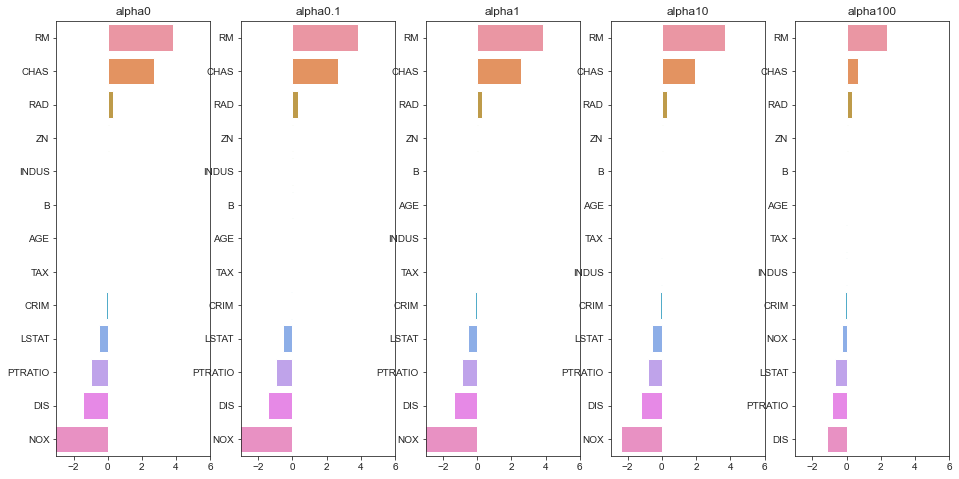

In [70]:
# 회귀계수 시각화
fig, axs = plt.subplots(figsize = (16,8), ncols = 5, nrows = 1)

coeff_df = pd.DataFrame()

for pos,alpha in enumerate(alphas):
    # ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data,y_target)

    # save coef
    coeff = pd.Series(data=ridge.coef_,index=x_data.columns)
    colname = 'alpha'+str(alpha)
    coeff_df[colname] = coeff

    # visualization
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])

plt.show()

In [99]:
#lasso
from sklearn.linear_model import Lasso, ElasticNet

# 회귀계수를 반환하는 함수
def get_linear_reg_eval(model_name, params =None, Xdata = None, ytarget=None,verbose = True, return_coeff = True):
    coeff_df = pd.DataFrame()
    if verbose : print(model_name)
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        elif model_name == 'Lasso' : model = Lasso(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param)
        neg_mse_score = cross_val_score(model,Xdata,ytarget,scoring="neg_mean_squared_error",cv =5)
        avg_rmse = np.mean(np.sqrt(-1 *neg_mse_score))
        print("Average RMSE Score in alpha {} : {:.3f}".format(param,avg_rmse))

        model.fit(Xdata,ytarget)
        if return_coeff :
            coeff = pd.Series(data=model.coef_,index = Xdata.columns)
            colname = 'alpha' + str(param)
            coeff_df[colname] = coeff
    return coeff_df
            

In [100]:
# lasso
lasso_alpha = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params = lasso_alpha,Xdata = x_data,ytarget = y_target)

Lasso
Average RMSE Score in alpha 0.07 : 5.612
Average RMSE Score in alpha 0.1 : 5.615
Average RMSE Score in alpha 0.5 : 5.669
Average RMSE Score in alpha 1 : 5.776
Average RMSE Score in alpha 3 : 6.189


In [106]:
sort_column = 'alpha'+str(lasso_alpha[0])
coeff_lasso_df.sort_values(by = sort_column,ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [104]:
# elasticnet
elastic_alpha = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params = elastic_alpha,Xdata = x_data,ytarget = y_target)

ElasticNet
Average RMSE Score in alpha 0.07 : 5.503
Average RMSE Score in alpha 0.1 : 5.478
Average RMSE Score in alpha 0.5 : 5.413
Average RMSE Score in alpha 1 : 5.522
Average RMSE Score in alpha 3 : 5.954


In [105]:
sort_column = 'alpha'+str(elastic_alpha[0])
coeff_elastic_df.sort_values(by = sort_column,ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.445833,3.252662,1.723610,0.933936,0.000000
CHAS,1.287475,0.987970,0.000000,0.000000,0.000000
RAD,0.284007,0.288726,0.311583,0.301569,0.199147
ZN,0.050678,0.051377,0.054045,0.053240,0.046018
B,0.010035,0.009963,0.008997,0.008339,0.007271
AGE,-0.008997,-0.007219,0.009475,0.020579,0.038926
TAX,-0.014636,-0.014952,-0.016300,-0.016439,-0.013587
INDUS,-0.045733,-0.045901,-0.031702,-0.012657,-0.000000
CRIM,-0.100331,-0.100079,-0.092503,-0.080371,-0.040903
NOX,-0.484864,-0.059533,-0.000000,-0.000000,-0.000000
